# Project Description

As working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.


## Loading Libraries

In [1]:
# Load all the libraries
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st

## Loading Data

In [2]:
# Load Data
result_01 = pd.read_csv('/datasets/project_sql_result_01.csv')
result_04 = pd.read_csv('/datasets/project_sql_result_04.csv')
result_07 = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
# Explore and Prepare Data For result_01
result_01.info()
print()

print('TOTAL OF NULL VALUES:')
print(result_01.isnull().sum())
display(result_01)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

TOTAL OF NULL VALUES:
company_name    0
trips_amount    0
dtype: int64


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


Upon investigating the data, there are no null values. The data indicates sixty-three taxi companies and the trip counts for each company for November 15-16, 2017. The company name column has appropriate object type to accomodate the data and do not see anything that needs to be modified or changed in either column. This should be adequate to pursue analyzing the data.

In [4]:
# Explore and Prepare Data For result_04
result_04.info()
print()

print('TOTAL OF NULL VALUES:')
print(result_04.isnull().sum())
display(result_04)
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

TOTAL OF NULL VALUES:
dropoff_location_name    0
average_trips            0
dtype: int64


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


Investigating the data, there are no null values. The data indicates ninety-three drop off locations in the Chicago area and the average trip counts for each neighborhood by taxis for November 2017. The data appears to be in order and no modifications or changes are needed. The data is ready to be analyzed.

## Analyze Data 
Now that the data has been explored and checked for missing values, I will investigate the more popular taxi companies based on the average number of trips while utilizing graphs to do so.

<AxesSubplot:title={'center':'Taxi Companies vs Number of Rides'}, xlabel='Taxi Companies', ylabel='Average Amount of Trips'>

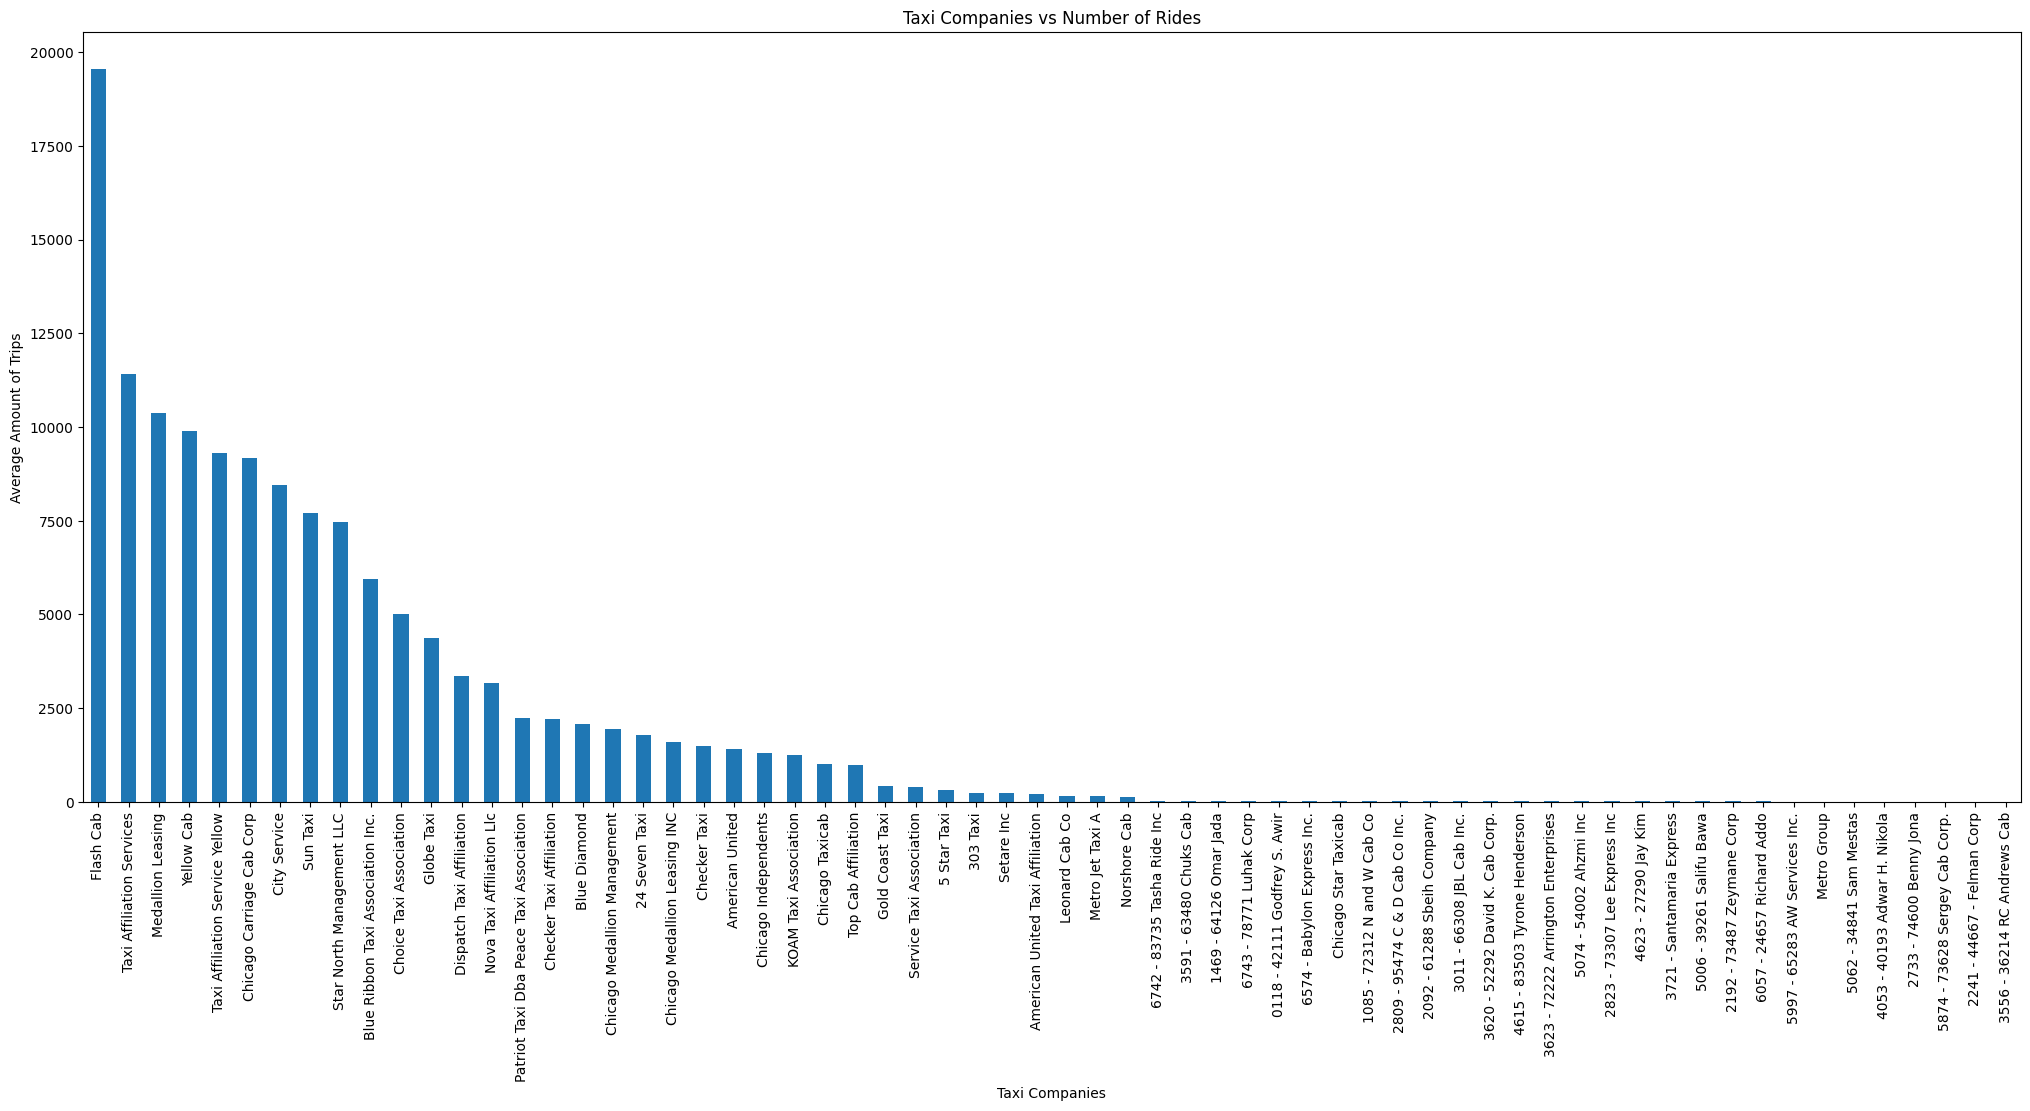

In [5]:
# Plot bar chart to vizualize distribution of number of rides per taxi company in Chicago
result_01.plot(kind='bar', 
                      x='company_name', 
                      xlabel='Taxi Companies', 
                      ylabel='Average Amount of Trips', 
                      title='Taxi Companies vs Number of Rides',
                      legend=False,
                      figsize=(25, 10))

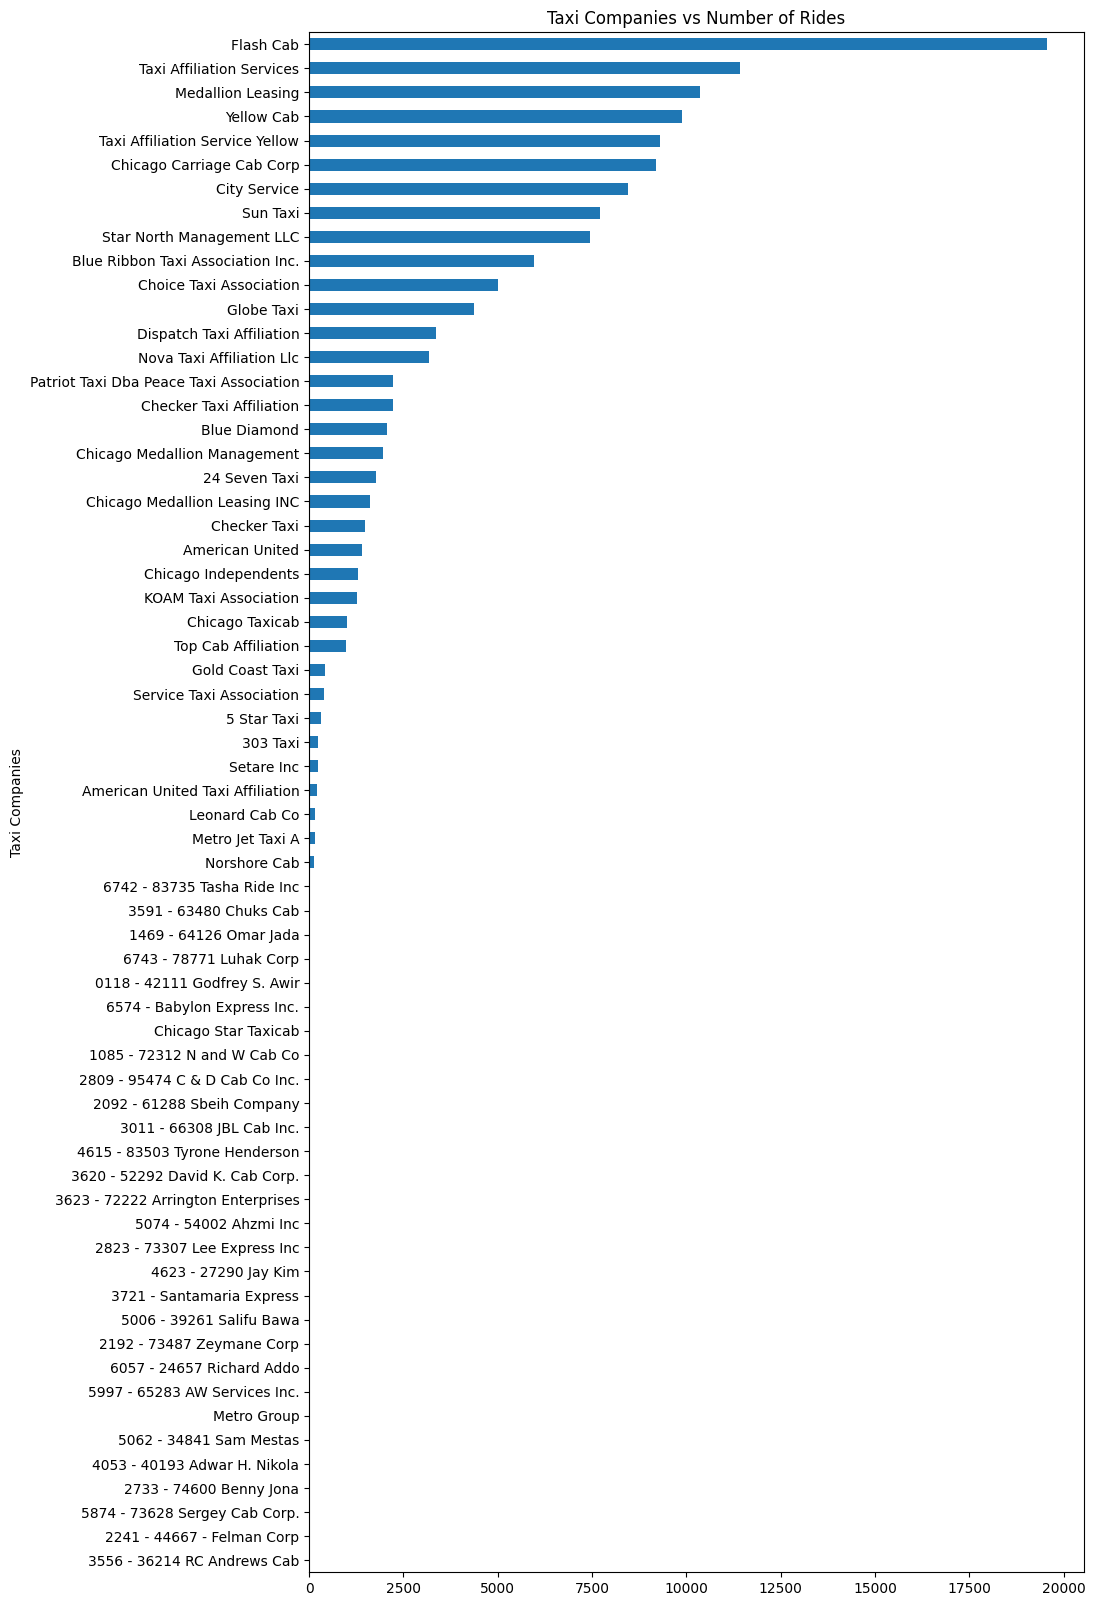

In [6]:
# ADDED BY REVIEWER
result_01.sort_values(by='trips_amount').plot(kind='barh', 
                      x='company_name', 
                      xlabel='Taxi Companies', 
                      ylabel='Average Amount of Trips', 
                      title='Taxi Companies vs Number of Rides',
                      legend=False,
                      figsize=(10, 20))

plt.show()

Looking at the above chart, Flash Cab appears to be the top taxi company in the Chicago area by a large margin, reaching near 20,000 trips. This is interesting seeing how many taxi companies are running and by how much business, Flash Cab does in comparison to other companies. Apparently purchasers like the service they recieve from Flash Cab or they have a massive presense in the Chicago area.

Next, we will look into the top 10 neighborhoods in Chicago where people get dropped off.

In [7]:
# Finding the top ten drop off locations  in Chicago by taxis
top_10_dropoff_neighborhoods = result_04.sort_values(by='average_trips', ascending=False).head(10)
print(top_10_dropoff_neighborhoods)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


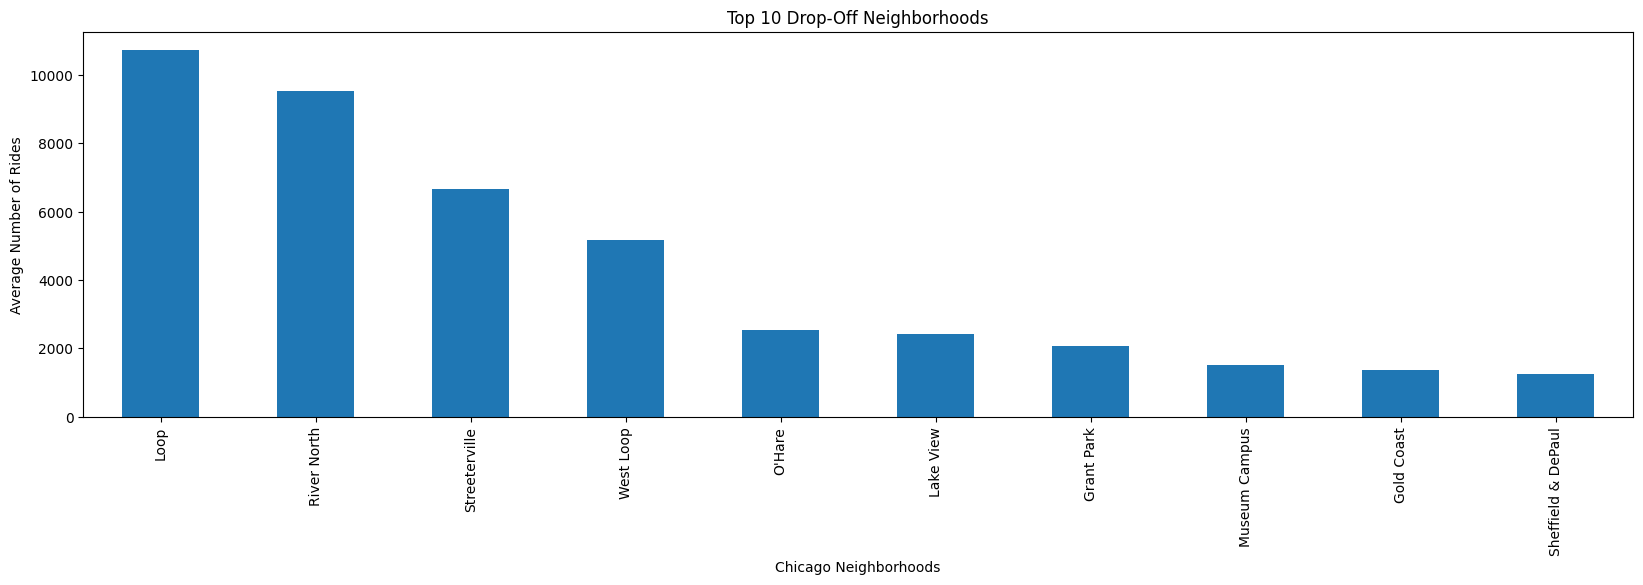

In [8]:
# Plot bar chart for top 10 drop-off locations in Chicago via taxi
top_10_dropoff_neighborhoods.plot(kind='bar', 
                      x='dropoff_location_name', 
                      xlabel='Chicago Neighborhoods', 
                      ylabel='Average Number of Rides', 
                      title='Top 10 Drop-Off Neighborhoods',
                      legend=False,
                      figsize=(20, 5))
plt.show()

Looking at the data and the graph above, the loop has the most drop offs on the list with 10,727. This is followed by River North, Streeterville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast and lastly Sheffield & Paul. This can be useful information gives insight on customer travel patterns and destination preferences in Chicago.

## Hypothesis Test
Using an independent samples t-test, we will look into whether the average weather duration of rides from the Loop to O'Hare International Airport vary on rainy Saturdays.

In setting up the test the null hypothesis (H0) is set as there is no difference in ride duration between good weather or bad conditions versus the opposing hypothsis (H1) that there is a difference. The significance level (alpha) is set at 0.05 to help balance sensitivity and error control without having too strict of limitations that may hurt the test.

In [9]:
# Test the hypotheses

 #h0 = The average duration of rides from the Loop to O'Hare International Airport does NOT change on rainy Saturdays.
 #h1 = The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

good = result_07[result_07['weather_conditions'] == 'Good']['duration_seconds']
bad = result_07[result_07['weather_conditions'] == 'Bad']['duration_seconds']

# Perform independent samples t-test
results = st.ttest_ind(good, bad)

print('p-value:', results.pvalue)
print()

# Check the p-value against alpha
alpha = 0.05

if results.pvalue < alpha:
    print("We reject the null hypothesis.")

else:
    print("We cannot reject the null hypothesis.")

p-value: 6.517970327099473e-12

We reject the null hypothesis.


The p-value came out to about 6.52 so the null hypothesis was rerejected. This points that based on the data provided the average duration of rides from the Loop to O'Hare International Airport differs in bad versus good weather conditions. This highlights the impact weather conditions could have on this route. Could be useful information in informing customers and employees to plan out their trips, especgetting to the airpoert to help with customer satisfaction concerns.

## Conclusion

In investigating the data provided gives a detail overview of Chicago's taxi industry. It also gives good information on transportation routes and favored areas customers come and go from. We see that Flash Cab is the most used company in the taxi businessesbased on the sheer volume higher trip volumes over al the other taxi companies. The top ten drop off locations point to the Loop and River North to be the most prominent neighborhoods  that taxis drop off to. These neighborhoods appear to have a lot of travel destinations for those visiting such as museums, tours, landmarks and hosts events that tourist may like to visit. It is also a major business districts which brings a lot of business coming n for work as well. It is also worth npoting that O'Hare International Airport is fifth on the list in the list of top drop off neighborhoods. Looking at the weather conditions that affect travel indicates that weather can have an impact on travel times to O'Hare International Airport. Bad weather may lead to more accidents and unsafe driving conditions that promote driving slower or using different routes. The rejection of the null hypothesis shows that there is a need to consider weather conditions in transporting planning for drivers and customers to plan out their trips to achieve a positive experience. 